<a href="https://colab.research.google.com/github/PranavkrishnaVadhyar/TensorFlow/blob/main/Tensorflow_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tensorflow

##Core learning algorithms

The algorithms we will focus on include:

1) Linear Regression
2)Classification
3) Clustering
4) Hidden Markov Models

###Linear regression

If data points are related linearly, we can generate a line of best fit for these points and use it to predict future values.

y = mx + c

Line of best fit refers to a line through a scatter plot of data points that best expresses the relationship between those points.




In [ ]:
!pip install -q sklearn

  Preparing metadata (setup.py) ... done


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [ ]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [ ]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
dftrain.shape

(627, 9)

###Training and testing dataset

Categorical data : Data which is a bunch of categories eg: gender:- male,female



In [ ]:
dfeval.shape

(264, 9)

In [ ]:
CATEGORICAL_COLUMNS = ['sex','n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique() #stores unique values of each feature
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype = tf.float32))
print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

###Training a model

Data is fed in batches of 32

Epochs = Is one stream of entire dataset. No of epochs is amount of time the model will see the entire data set.

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [ ]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.77272725


In [ ]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[0]) #Print the details of 0
print(y_eval.loc[0])  #THis is just to chech the main evaluation data set which contains weather a person survived or not
print(result[0]['probabilities'][0]) # Print the probability of survival. These many not be accurate since the model is not that great

sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
0
0.9198357


###Classification

To predict classes

Dataset : Iris flower data set

In [ ]:
from __future__ import absolute_import, print_function, unicode_literals

import tensorflow as tf
import pandas as pd


In [ ]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa','Versicolor', 'Virginica']
# Lets define somw constants to help us later on

In [ ]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

In [ ]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
train_y = train.pop('Species')
test_y = test.pop('Species')

In [ ]:
train.shape

(120, 4)

In [ ]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)


In [ ]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


###Building the model

Classifiers:

LinearClassifier : Similar to linear regression

Deep Nueral network :

In [ ]:
# DNN with hidden layers with 30 and 10 hidden nodes

classifier = tf.estimator.DNNClassifier(
    feature_columns = my_feature_columns,

    hidden_units = [30, 10],
    n_classes = 3

)


In [ ]:
classifier.train(
    input_fn = lambda : input_fn(train, train_y, training=True)
)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


KeyboardInterrupt: ignored

In [ ]:
classifier.evaluate(input_fn = lambda: input_fn(test,test_y, training=False))
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

###Clustering

Unsupervised learning

k = no of centroids

Euclidian distance : distance of a data point from every centroid.

The data point is assigned to the closest centroid.

center of mass : The centroid is placed at the center of its respective cluster.

This process is done till  



###Hidden markov models

In [ ]:
import tensorflow_probability as tfp




##Neural networks

- Main use is for classification

- Made up of layers

- 1st layer : Input layer

       for images no of neural networks = no of pixels

- 2nd layer : Ouput layer

- Here no of networks  = no of classes
       Each class has value from 0 to 1. The sum of

- Hidden Layers

    Each layers is connected using weights. If every single nodes is connected to everyone from prev layer : Densely connected.

    Biases : Constant value that is connected to the hidden layers and one is connected output layers


- Weighted sum = Sumof (value of each nodes * Its weight) + Bias

###Activation functions

    - Relu Rcetified linear unit : Makes - numbers into 0

    - TanH = Makes them into -1 and 1

    - Sigmoid = Makes them into values between 0 to 1

- It is applied to the weighted sum of output neuron.



- Loss/cost function : How far the ouput is from the expected value

        1) Mean squared error

        2) Mean absolute error

        3) Hinge loss

###Gradient descent

- Tells us what direction to move the function to reduce loss function

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt



##Dataset

mnist Fashion dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

#Split data set into training data and testing data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape #(images,pixels,pixels)

(60000, 28, 28)

In [4]:
train_images[0,23,23]
print(train_images[0:])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top','Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

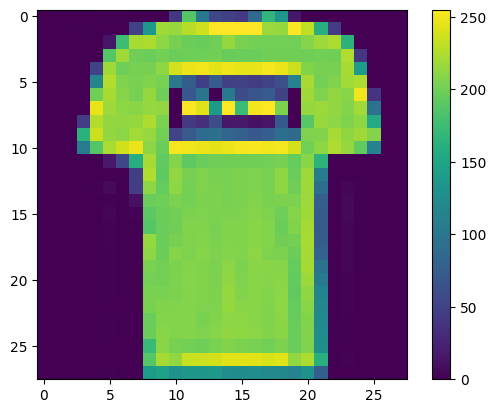

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

##Data preprocessing

- Applying prior tranformations to our data before feeding the model. In this case we will scale our pixel values in between 1 and 0.
- Makes it easier to read data



In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

In [9]:
#Training the model
#Sequential is a type of nn

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  #input layer ; Flattens the matrix
    keras.layers.Dense(128, activation = 'relu'),  #hidden layer
    keras.layers.Dense(10, activation = 'softmax')  #output layer
])

In [10]:
#Compiling the model

#Hyper parameter tuning is the process of changing the hyper parameters like no of neurons, activation function etc

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4995 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3767 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3376 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3142 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2967 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2800 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2674 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2580 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2466 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0

In [1]:
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose = 1)

print("Test accuracy : ", test_acc)

NameError: ignored

- The condition where a model perform much better in training data and not good in the testing data : Overfitting
- Can be changed by tweaking the hyper parameters